In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 6

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/22 [>.............................] - ETA: 6s - loss: 2.0397 - accuracy: 0.0703
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 1s 11ms/step - loss: 1.8743 - accuracy: 0.1157 - val_loss: 1.6709 - val_accuracy: 0.1790
Epoch 2/1000
 1/22 [>.............................] - ETA: 0s - loss: 1.7357 - accuracy: 0.1875
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 1.6530 - accuracy: 0.2528 - val_loss: 1.4980 - val_accuracy: 0.4382
Epoch 3/1000
 1/22 [>.............................] - ETA: 0s - loss: 1.5814 - accuracy: 0.2500
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 1.4995 - accuracy: 0.3577 - val_loss: 1.3572 - val_accuracy: 0.5564
Epoch 4/1000
 1/22 [>.............................] - ETA: 0s - loss: 1.3524 - accuracy: 0.5234


 1/22 [>.............................] - ETA: 0s - loss: 0.6923 - accuracy: 0.7656
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 3ms/step - loss: 0.7455 - accuracy: 0.6922 - val_loss: 0.5139 - val_accuracy: 0.8362
Epoch 29/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.6464 - accuracy: 0.8047
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 3ms/step - loss: 0.7286 - accuracy: 0.7197 - val_loss: 0.5025 - val_accuracy: 0.8492
Epoch 30/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.7877 - accuracy: 0.7031
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.7223 - accuracy: 0.7193 - val_loss: 0.5003 - val_accuracy: 0.8471
Epoch 31/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.7766 - accuracy: 0.6797
Epoch 31

 1/22 [>.............................] - ETA: 0s - loss: 0.6432 - accuracy: 0.7500
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.6386 - accuracy: 0.7566 - val_loss: 0.3641 - val_accuracy: 0.9089
Epoch 56/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.6141 - accuracy: 0.7656
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.7537 - val_loss: 0.3672 - val_accuracy: 0.9002
Epoch 57/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.6011 - accuracy: 0.7656
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.6044 - accuracy: 0.7595 - val_loss: 0.3594 - val_accuracy: 0.9100
Epoch 58/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.5803 - accuracy: 0.7734
Epoch 58

 1/22 [>.............................] - ETA: 0s - loss: 0.6629 - accuracy: 0.7734
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.5441 - accuracy: 0.7892 - val_loss: 0.3120 - val_accuracy: 0.9306
Epoch 83/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.5104 - accuracy: 0.7812
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 3ms/step - loss: 0.5911 - accuracy: 0.7624 - val_loss: 0.3048 - val_accuracy: 0.9447
Epoch 84/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.4955 - accuracy: 0.7656
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.7805 - val_loss: 0.3038 - val_accuracy: 0.9328
Epoch 85/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.5872 - accuracy: 0.7500
Epoch 85

 1/22 [>.............................] - ETA: 0s - loss: 0.4573 - accuracy: 0.8281
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 3ms/step - loss: 0.5398 - accuracy: 0.7826 - val_loss: 0.2810 - val_accuracy: 0.9393
Epoch 110/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.5699 - accuracy: 0.8047
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.5384 - accuracy: 0.8051 - val_loss: 0.2885 - val_accuracy: 0.9414
Epoch 111/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.6373 - accuracy: 0.7656
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.8047 - val_loss: 0.2887 - val_accuracy: 0.9317
Epoch 112/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.4648 - accuracy: 0.8125
Ep

Epoch 136/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.5675 - accuracy: 0.8125
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.4943 - accuracy: 0.8177 - val_loss: 0.2586 - val_accuracy: 0.9425
Epoch 137/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.5916 - accuracy: 0.7656
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.5006 - accuracy: 0.8163 - val_loss: 0.2468 - val_accuracy: 0.9544
Epoch 138/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.5807 - accuracy: 0.7578
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.5305 - accuracy: 0.8036 - val_loss: 0.2642 - val_accuracy: 0.9393
Epoch 139/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.4712 - accu

Epoch 163/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.5858 - accuracy: 0.7812
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 3ms/step - loss: 0.5095 - accuracy: 0.8177 - val_loss: 0.2546 - val_accuracy: 0.9425
Epoch 164/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.5561 - accuracy: 0.7969
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 5ms/step - loss: 0.5023 - accuracy: 0.8116 - val_loss: 0.2547 - val_accuracy: 0.9403
Epoch 165/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.5256 - accuracy: 0.8359
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.5107 - accuracy: 0.8156 - val_loss: 0.2444 - val_accuracy: 0.9469
Epoch 166/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.4269 - accu

Epoch 190/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.6768 - accuracy: 0.7812
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.5051 - accuracy: 0.8083 - val_loss: 0.2353 - val_accuracy: 0.9501
Epoch 191/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.4148 - accuracy: 0.8594
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.4503 - accuracy: 0.8362 - val_loss: 0.2338 - val_accuracy: 0.9523
Epoch 192/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.5543 - accuracy: 0.8125
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.4813 - accuracy: 0.8268 - val_loss: 0.2348 - val_accuracy: 0.9490
Epoch 193/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.4613 - accu

Epoch 217/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.4689 - accuracy: 0.8359
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.8387 - val_loss: 0.2243 - val_accuracy: 0.9458
Epoch 218/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.4206 - accuracy: 0.8281
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 3ms/step - loss: 0.4728 - accuracy: 0.8188 - val_loss: 0.2141 - val_accuracy: 0.9523
Epoch 219/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.3735 - accuracy: 0.9141
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.8300 - val_loss: 0.2145 - val_accuracy: 0.9501
Epoch 220/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.3744 - accu

Epoch 244/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8906
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.4544 - accuracy: 0.8430 - val_loss: 0.2171 - val_accuracy: 0.9534
Epoch 245/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.5080 - accuracy: 0.7734
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.8311 - val_loss: 0.2226 - val_accuracy: 0.9447
Epoch 246/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.4367 - accuracy: 0.8203
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 0.4692 - accuracy: 0.8347 - val_loss: 0.2263 - val_accuracy: 0.9469
Epoch 247/1000
 1/22 [>.............................] - ETA: 0s - loss: 0.3892 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 [==============================] - 0s 858us/step - loss: 0.2129 - accuracy: 0.9501


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 60ms/step
[4.8386586e-01 7.0480213e-02 9.2307082e-04 4.4014320e-01 4.4761132e-03
 1.1159484e-04]
0


# 混同行列

29/29 [==============================] - 0s 677us/step


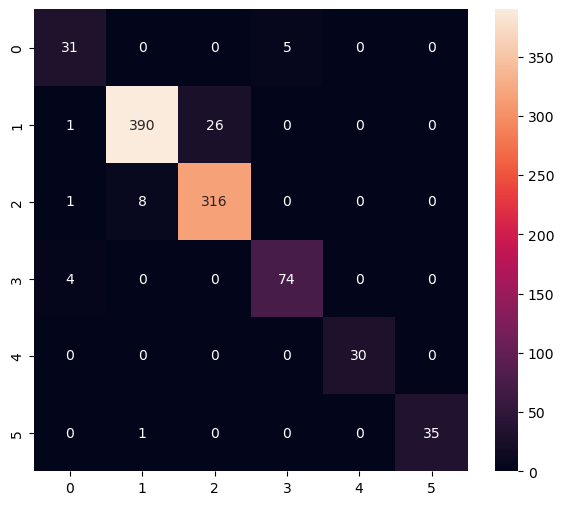

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        36
           1       0.98      0.94      0.96       417
           2       0.92      0.97      0.95       325
           3       0.94      0.95      0.94        78
           4       1.00      1.00      1.00        30
           5       1.00      0.97      0.99        36

    accuracy                           0.95       922
   macro avg       0.95      0.95      0.95       922
weighted avg       0.95      0.95      0.95       922



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\asbot\AppData\Local\Temp\tmp5orjsv27\assets


6632

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.8386586e-01 7.0480242e-02 9.2307082e-04 4.4014317e-01 4.4761132e-03
 1.1159474e-04]
0
